## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными - (i) получить их и (ii) обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнем с импорта torch

In [0]:
import torch

Tensor - есть массив (возможно, многомерный) числовых значений. tensor с одной осью называется (в математике) вектором, с двумя - матрицей. Для массивов с более чем двумя осями нет специальных имен - их называют просто тензорами.
Самый простой объект, который мы можем создать - это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Мы можем получить форму экземпляра tensor через свойство shape.

In [3]:
x.shape

torch.Size([12])

Узнать расположен ли он на gpu или cpu можно через специальный аттрибут - device

In [4]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причем количество элементов осталось прежним.

In [5]:
x.view((3,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [6]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [7]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно указав все значения

In [9]:
torch.tensor([[1,2,3], [4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использовает равномерное распределение, второе - нормальное

In [10]:
torch.rand((2,3,4))

tensor([[[0.0283, 0.2481, 0.8396, 0.0673],
         [0.5800, 0.9561, 0.6851, 0.1134],
         [0.1077, 0.8303, 0.3881, 0.7796]],

        [[0.6978, 0.4570, 0.1966, 0.5086],
         [0.3385, 0.1703, 0.9723, 0.6377],
         [0.3537, 0.2707, 0.7842, 0.8957]]])

In [11]:
torch.randn((2,3,4))

tensor([[[-0.7361,  1.0595,  0.3569,  0.0211],
         [ 1.1500, -0.1150, -0.3395, -0.1438],
         [-1.7773,  0.6058,  0.0085,  0.7307]],

        [[ 0.6144,  2.1052,  1.8814,  2.8810],
         [ 0.5700, -2.3005,  0.1263,  0.2533],
         [-0.1511,  0.0363,  0.5727,  0.0724]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов. 

In [12]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [13]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [14]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [15]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [16]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [17]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

Суммирование всех элементов тезора дает тензор с одним элементом.

In [18]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [19]:
x.sum().item()

66

## Broadcast 

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast'а: Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [20]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путем broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [21]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [22]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [23]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Мы так же можем изменять значения в тензоре

In [24]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значение. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [25]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [26]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [27]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примениете оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точка (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимся вершинами

In [28]:
x = torch.tensor([1., 1., 1., 2.]).reshape((2, 2))
x

tensor([[1., 1.],
        [1., 2.]])

In [29]:
y = torch.tensor([2., -1., -1., 1.]).reshape((2, 2))
y

tensor([[ 2., -1.],
        [-1.,  1.]])

In [30]:
torch.mm(x, y)

tensor([[1., 0.],
        [0., 1.]])

In [0]:
verteces = [[1.,1.], [1.,-1.], [-1., -1.], [-1., 1.]]
vt = [torch.tensor(v) for v in verteces]
op = torch.tensor([[1.,2.], [3.,4.]])

In [0]:
transformed = [torch.mv(op, t) for t in vt]

In [33]:
for i in range(-1, 3):
    v1 = vt[i]
    v2 = vt[i + 1]
    distance = torch.sqrt(((v1 - v2)**2).sum())
    print("Distance between {} and {} was {:.3f}".format(v1, v2, distance.item()))
    
    v1 = transformed[i]
    v2 = transformed[i + 1]
    distance = torch.sqrt(((v1 - v2)**2).sum())
    print("Distance between {} and {} now {:.3f}".format(v1, v2, distance.item()))

Distance between tensor([-1.,  1.]) and tensor([1., 1.]) was 2.000
Distance between tensor([1., 1.]) and tensor([3., 7.]) now 6.325
Distance between tensor([1., 1.]) and tensor([ 1., -1.]) was 2.000
Distance between tensor([3., 7.]) and tensor([-1., -1.]) now 8.944
Distance between tensor([ 1., -1.]) and tensor([-1., -1.]) was 2.000
Distance between tensor([-1., -1.]) and tensor([-3., -7.]) now 6.325
Distance between tensor([-1., -1.]) and tensor([-1.,  1.]) was 2.000
Distance between tensor([-3., -7.]) and tensor([1., 1.]) now 8.944


## Вероятности

In [0]:
# Равномерное распределение вероятности

In [35]:
torch.rand(10)

tensor([0.7893, 0.7869, 0.2463, 0.4393, 0.0809, 0.1068, 0.8385, 0.0011, 0.5120,
        0.8587])

In [0]:
## Нормальное распределение

In [37]:
torch.randn(10)

tensor([ 0.6983, -2.7795, -0.3660, -1.1086, -0.1580, -0.5968,  2.2219,  0.4923,
        -1.7868, -0.6415])

In [0]:
## Равномерное на целых числах

In [39]:
torch.randint(0, 10, (10,))

tensor([8, 4, 5, 5, 6, 1, 0, 0, 8, 3])

## Постройте график плотности для нормального распределения

In [0]:
import matplotlib.pyplot as plt

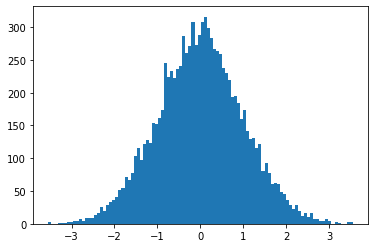

In [41]:
plt.hist(torch.randn(10000), bins=100);

## Теорема Баеса

In [0]:
import torchvision

In [0]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [0]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [45]:
mnist_train[0][0].shape

torch.Size([784])

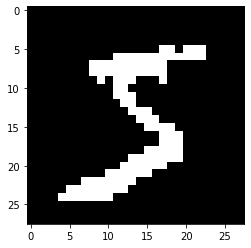

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

## Практика - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для этой задачи для меток 1 и 2

In [47]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: <function transform at 0x7f270e1c1048>

In [0]:
dev = torch.device('cuda')

In [0]:
n_class1, n_class2 = torch.tensor(0).to(dev), torch.tensor(0).to(dev)
classes_stat = torch.zeros((2,2,784)).to(dev) # 2 classes (1 and 2), 2 values (0 and 1), 784 points
total_stat = torch.zeros((2,784)).to(dev) # 2 values (0 and 1), 784 points

In [50]:
for i in range(len(mnist_train)):
  class_id = mnist_train[i][1]
  if class_id == 1 or class_id == 2:
    n_class1 += 1 if class_id == 1 else 0
    n_class2 += 1 if class_id == 2 else 0
    
    mnist_train_item = mnist_train[i][0].numpy().astype(int)
    for p in range(784):
      v = mnist_train_item[p]
      # gather stats of values 0/1 for each class and each point of image
      classes_stat[class_id - 1][v][p] += 1
      # gather stats of values 0/1 per each point of image
      total_stat[v][p] += 1

print(n_class1, n_class2)

tensor(6742, device='cuda:0') tensor(5958, device='cuda:0')


In [0]:
# calc probability of classes
p_1 = n_class1 / float(n_class1 + n_class2)
p_2 = 1. - p_1

# calc probability of values 0/1 for each class and each point of image
classes_stat[0] /= float(n_class1)
classes_stat[1] /= float(n_class2)
# calc probability of values 0/1 per each point of image
total_stat /= float(n_class1 + n_class2)

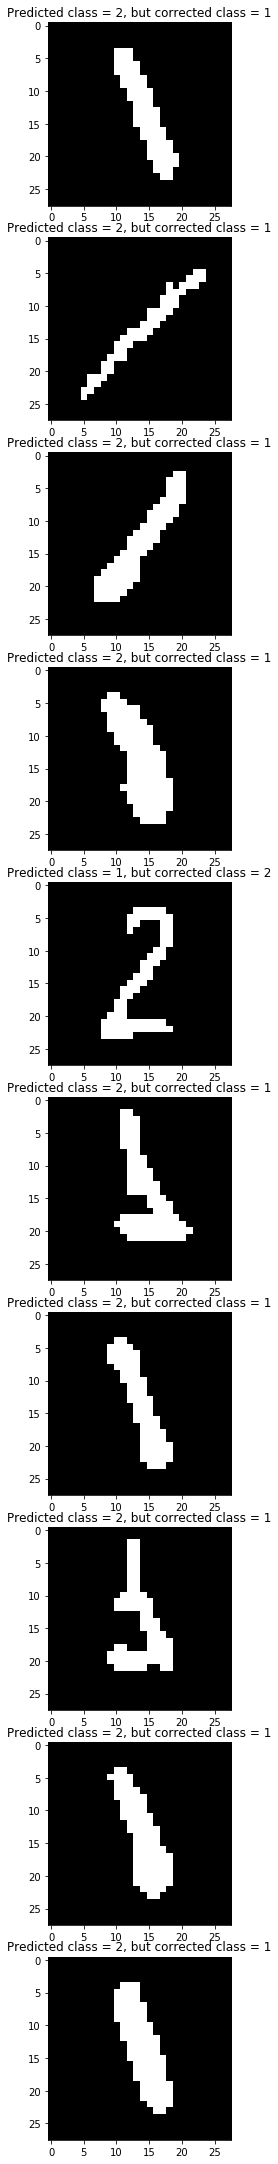

<Figure size 576x576 with 0 Axes>

Total count of examples with incorrect predicted class: 88


In [52]:
#torch.set_default_tensor_type('torch.DoubleTensor')
errors_count, images = 0, 0
fig, axes = plt.subplots(10, 1, figsize=(10,30))
fig.tight_layout()

for i in range(len(mnist_test)):
  class_id = mnist_test[i][1]
  if class_id == 1 or class_id == 2:
    class_fcst, p1 = 1, 1.
    mnist_test_item = mnist_test[i][0].numpy().astype(int)
    for p in range(784):
      v = mnist_test_item[p]
      p1 *= classes_stat[0][v][p] / total_stat[v][p] # calc probability of class 1
      #print(p, p1, classes_stat[0][v][p], total_stat[v][p])
    
    #print(class_id, p1, p1*p_1, p_1)
    #break
    if p1 * p_1 > 0.5:
      class_fcst = 1
    else:
      class_fcst = 2
    
    if class_id != class_fcst:
      errors_count += 1
      if images < 10:
        #print(f'Predicted class = {class_fcst}, but corrected class = {class_id}')
        #plt.imshow(mnist_test_item.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
        #plt.title(f'Predicted class = {class_fcst}, but corrected class = {class_id}')
        axes[images].imshow(mnist_test_item.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
        axes[images].set_title(f'Predicted class = {class_fcst}, but corrected class = {class_id}')
        images += 1

plt.show()
print(f'Total count of examples with incorrect predicted class: {errors_count}')